In [1]:
import pandas as pd
import numpy as np
import pickle
import calendar
import matplotlib.pyplot as plt

In [38]:
# ice_cover_dir = '/home/robbie/uit_mnt/home/romal7177/arctex/ice_cover/'

# df = pickle.load(open(f'{ice_cover_dir}clock_flade.p','rb'))
# df['doy'] = [x.timetuple().tm_yday for x in df['dt']]


# for x in np.arange(0,6):
#     max_cover = np.nanmax(df[x])
#     df[f'norm_{x}'] = df[x]/max_cover
# df.sort_values('dt',inplace=True)

# years = np.arange(2003,2024)

# df.to_csv('clock_flade.csv')

In [40]:
df = pd.read_csv('clock_flade.csv',parse_dates=['dt'])

In [28]:
thresh=0.85

owd = {}
regions=[0,1,2,5]
for x in regions:
    
    open_water_days=[]
    
    for year in years:

        # do all year

        df_yr = df[df['year']==year]

        df_yr = df_yr[df_yr[f'norm_{x}']<thresh]

        all_days_OW = df_yr.shape[0]

        # do DJF
        
        df_yr = df[df['year']==year]

        if calendar.isleap(year): feb_days=29
        else: feb_days=28
        
        df_yr = df_yr[(df_yr['doy']<=31+feb_days)]

        df_yr = df_yr[df_yr[f'norm_{x}']<thresh]
        
        days0 =  df_yr.shape[0]
        
        df_yr = df[df['year']==year-1]
        
        df_yr = df_yr[(df_yr['doy']>=365-31)]

        df_yr = df_yr[df_yr[f'norm_{x}']<thresh]
        
        days1 =  df_yr.shape[0]
        
        DJF_days_OW = days0+days1

        open_water_days.append( {'year':year,f'all_days_OW_{x+1}':all_days_OW,f'DJF_days_OW_{x+1}':DJF_days_OW })

    owd[x] = pd.DataFrame(open_water_days)

In [29]:
lod=[]
for region in regions:

    value = owd[region]
    lod.append(value)
df_ = pd.concat(lod,axis=1)
df_ = df_.loc[:,~df_.columns.duplicated()].copy()
df_.to_csv('flade_clockface.csv')
df_

,year,all_days_OW_1,DJF_days_OW_1,all_days_OW_2,DJF_days_OW_2,all_days_OW_3,DJF_days_OW_3,all_days_OW_6,DJF_days_OW_6
0,2003,58,2,110,5,187,21,57,0
1,2004,67,0,137,0,216,2,0,0
2,2005,40,2,165,43,221,70,20,0
3,2006,37,6,174,31,180,19,0,0
4,2007,17,3,112,7,235,13,2,0
5,2008,31,0,118,0,215,16,49,0
6,2009,27,3,142,12,189,7,7,0
7,2010,40,2,141,11,161,8,42,0
8,2011,44,6,148,8,162,6,43,0
9,2012,26,0,130,36,249,33,63,0


In [32]:
regions

[0, 1, 2, 5]

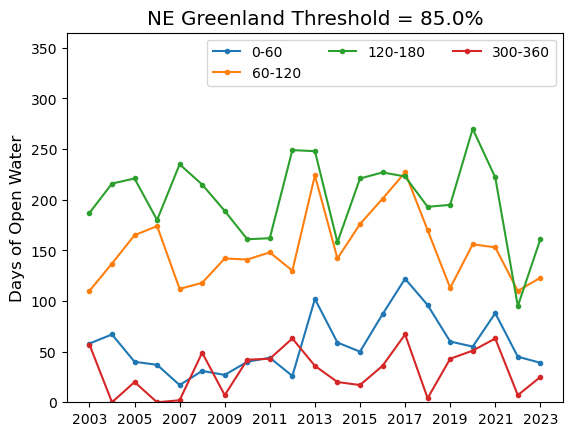

In [36]:
for region in regions:
    plt.plot(df_['year'],df_[f'all_days_OW_{region+1}'],label=f'{(region)*60}-{(region+1)*60}',marker='.')

plt.title(f'NE Greenland Threshold = {thresh*100}%',fontsize='x-large')
plt.ylabel('Days of Open Water',fontsize='large')
plt.xticks(years[::2])
plt.ylim(0,365)
plt.legend(ncols=3,loc='upper right')
plt.show()